In [10]:
import numpy as np
import pandas as pd
from ripser import ripser
from persim import plot_diagrams

In [11]:
import sys
sys.path.append("../")

In [12]:
from coal_mapper.mapper import CoalMapper

# Data
Sample data taken from coal-TDA repo: `active_plants_MULTI.csv`

In [4]:
df = pd.read_csv('../data_processing/data.csv')

In [6]:
df.head()

,Year,PSTATABB,ORISPL,LAT,LON,label,CAPFAC,PLNGENAN,PLCO2AN,PLNOXAN,PLSO2AN,decom,CO2limits,CO2limitsOppose,StateMineEmployment,CoalReceipts,RenewableReplacement,OperatingYear,NameplateCapacity
0,2020,AL,3.0,31.01,-88.01,"2020: Barry, AL",0.33,10499146.0,6846726.51,1656.34,1283.6,0,60.696,37.519,2530.0,1582050.0,1,1969,403.7
1,2020,AL,26.0,33.24,-86.46,"2020: E C Gaston, AL",0.21,3796945.0,3832358.59,2254.77,760.1,0,55.512,44.119,2530.0,649725.0,1,1969,403.7
2,2020,LA,51.0,32.03,-93.57,"2020: Dolet Hills Power Station, LA",0.11,667237.0,830981.31,1009.06,3107.0,0,51.529,47.946,125.0,534625.0,1,1974,952.0
3,2020,AL,56.0,31.49,-87.91,"2020: Charles R Lowman, AL",0.03,317291.0,414894.31,857.32,264.6,0,46.366,52.895,2530.0,27702.0,1,1986,720.7
4,2020,NE,59.0,40.85,-98.35,"2020: Platte, NE",0.38,362024.0,507889.91,443.58,369.1,0,59.915,39.644,0.0,267287.0,1,1982,109.8


In [8]:
df.columns

Index(['Year', 'PSTATABB', 'ORISPL', 'LAT', 'LON', 'label', 'CAPFAC',
       'PLNGENAN', 'PLCO2AN', 'PLNOXAN', 'PLSO2AN', 'decom', 'CO2limits',
       'CO2limitsOppose', 'StateMineEmployment', 'CoalReceipts',
       'RenewableReplacement', 'OperatingYear', 'NameplateCapacity'],
      dtype='object')

# Persistence Diagrams
Smoke test for generating a persistence diagram from a multidimensional dataframe

In [22]:
newdf = df.select_dtypes(include=np.number)

In [23]:
newdf.head()

,Year,ORISPL,LAT,LON,CAPFAC,PLNGENAN,PLCO2AN,PLNOXAN,PLSO2AN,decom,CO2limits,CO2limitsOppose,StateMineEmployment,CoalReceipts,RenewableReplacement,OperatingYear
0,2020,3.0,31.01,-88.01,0.33,10499146.0,6846726.51,1656.34,1283.6,0,60.696,37.519,2530.0,1582050.0,1,1969
1,2020,26.0,33.24,-86.46,0.21,3796945.0,3832358.59,2254.77,760.1,0,55.512,44.119,2530.0,649725.0,1,1969
2,2020,51.0,32.03,-93.57,0.11,667237.0,830981.31,1009.06,3107.0,0,51.529,47.946,125.0,534625.0,1,1974
3,2020,56.0,31.49,-87.91,0.03,317291.0,414894.31,857.32,264.6,0,46.366,52.895,2530.0,27702.0,1,1986
4,2020,59.0,40.85,-98.35,0.38,362024.0,507889.91,443.58,369.1,0,59.915,39.644,0.0,267287.0,1,1982


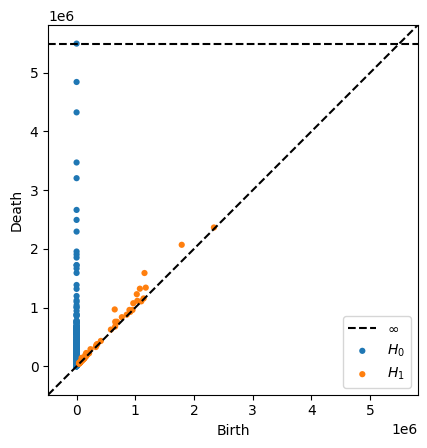

In [24]:
data = newdf.values

diagrams = ripser(data,maxdim=1)['dgms']
plot_diagrams(diagrams, show=True)

# Thoughts
* Ideally we have enough data to generate a persistence diagram for each plant. This can be used to generate a loss term that can be used for clustering.
* Could be interesting also to represent groups of plants that are nearby as graphs. What constitutes an edge? Some sort of strategic connection for shutting them down (e.g. same supply chain to target)
* Look at papers with code to identify environmental datasets and methods used. -> probably a Sid job